In [68]:
import pandas as pd

# Charger le dataset Telco Churn
df = pd.read_csv("C:/Users/PC/Documents/projet_churn_teleco/data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Aperçu des données
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [69]:
import pandas as pd

# Charger le dataset Telco Churn
df = pd.read_csv("C:/Users/PC/Documents/projet_churn_teleco/data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Aperçu des données
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [70]:
# Taille du dataset
df.shape

(7043, 21)

In [71]:
# Types de données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [72]:
# Valeurs uniques de la cible
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [73]:
# Nettoyage de la colonne 'TotalCharges'
# Convertir en numérique + détecter valeurs manquantes
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [75]:
# Supprimer les lignes incomplètes
df.dropna(inplace=True)
df.shape

(7032, 21)

In [76]:
# statistiques generale
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032,7032,7032.000000,7032,7032,7032.000000,7032,7032,7032,7032,...,7032,7032,7032,7032,7032,7032,7032,7032.000000,7032.000000,7032
unique,7032,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,NaN,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,1,3549,NaN,3639,4933,NaN,6352,3385,3096,3497,...,3094,3472,2809,2781,3875,4168,2365,NaN,NaN,5163
mean,NaN,NaN,0.162400,NaN,NaN,32.421786,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.798208,2283.300441,NaN
std,NaN,NaN,0.368844,NaN,NaN,24.545260,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.085974,2266.771362,NaN
min,NaN,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.587500,401.450000,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.862500,3794.737500,NaN


In [77]:
#Afficher les colonnes object + leurs valeurs uniques :
for col in df.select_dtypes(include='object'):
    print(f"{col} → {df[col].unique()}")

customerID → ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender → ['Female' 'Male']
Partner → ['Yes' 'No']
Dependents → ['No' 'Yes']
PhoneService → ['No' 'Yes']
MultipleLines → ['No phone service' 'No' 'Yes']
InternetService → ['DSL' 'Fiber optic' 'No']
OnlineSecurity → ['No' 'Yes' 'No internet service']
OnlineBackup → ['Yes' 'No' 'No internet service']
DeviceProtection → ['No' 'Yes' 'No internet service']
TechSupport → ['No' 'Yes' 'No internet service']
StreamingTV → ['No' 'Yes' 'No internet service']
StreamingMovies → ['No' 'Yes' 'No internet service']
Contract → ['Month-to-month' 'One year' 'Two year']
PaperlessBilling → ['Yes' 'No']
PaymentMethod → ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn → ['No' 'Yes']


In [78]:
df_simplified = df.copy()

cols_to_clean = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for col in cols_to_clean:
    df_simplified[col] = df_simplified[col].replace('No internet service', 'No')

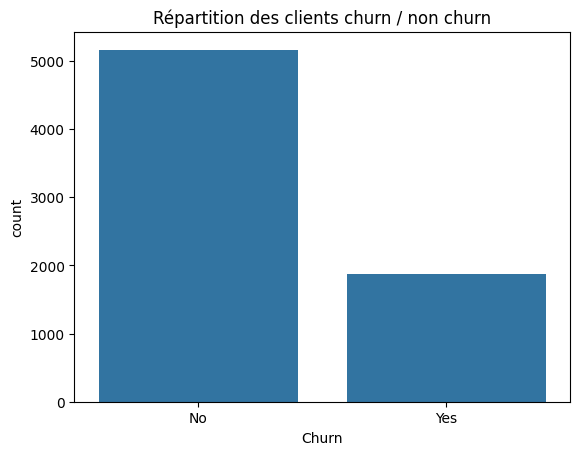

In [79]:
#Visualisation :
import matplotlib.pyplot as plt
import seaborn as sns

# Répartition du churn
sns.countplot(x='Churn', data=df)
plt.title("Répartition des clients churn / non churn")
plt.show()

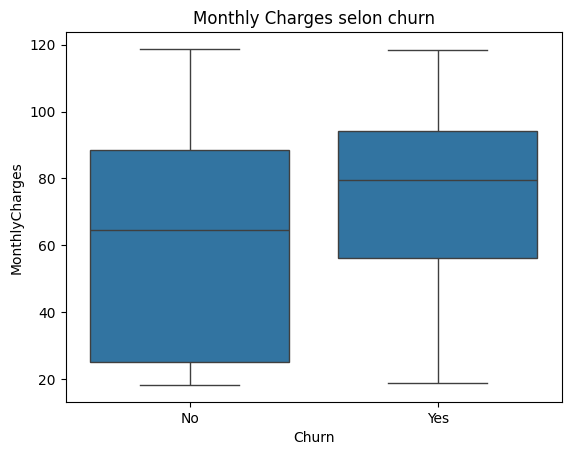

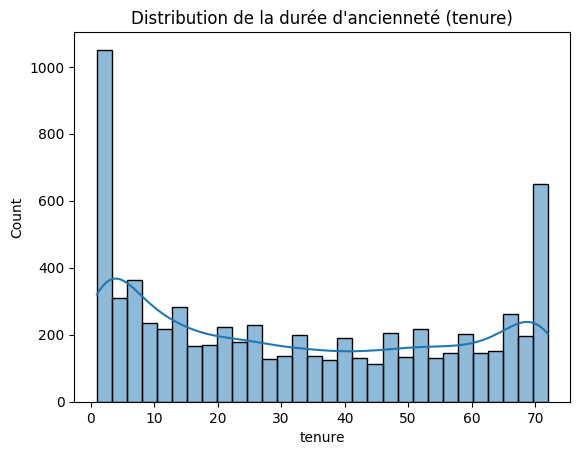

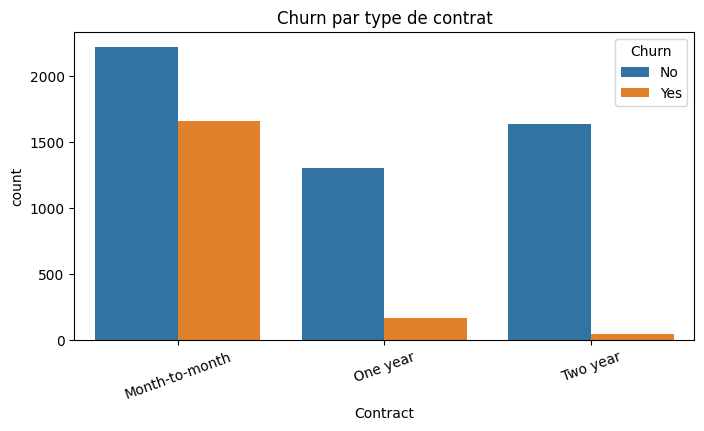

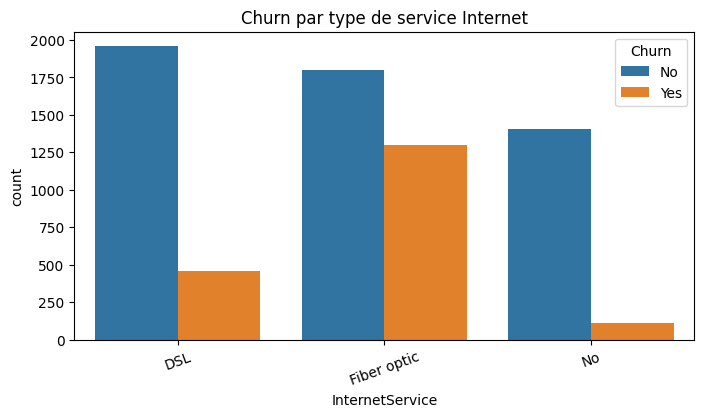

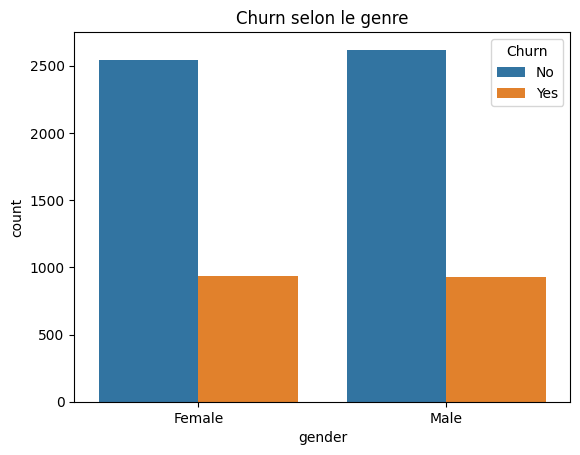

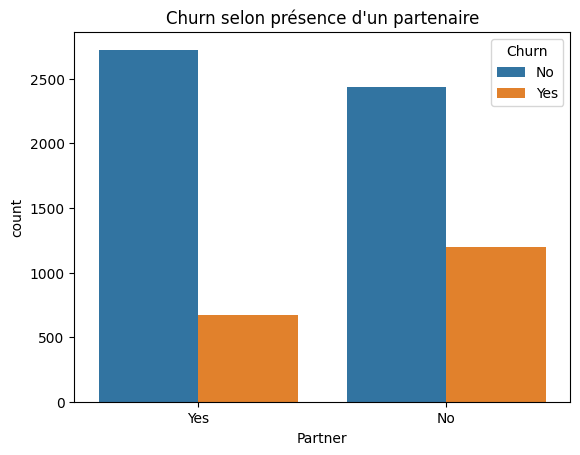

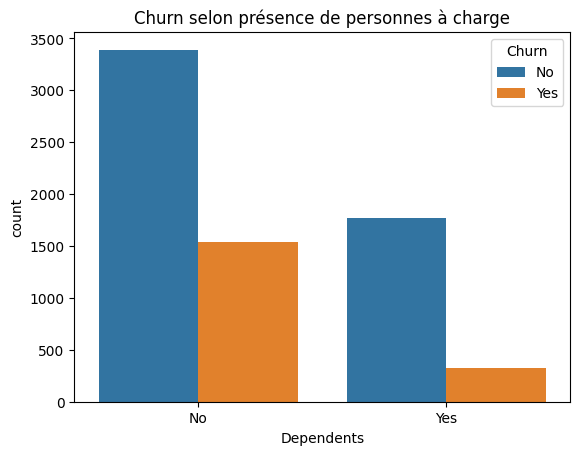

In [80]:
# Monthly Charges selon churn
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title("Monthly Charges selon churn")
plt.show()

# Tenure distribution
sns.histplot(data=df, x='tenure', kde=True, bins=30)
plt.title("Distribution de la durée d'ancienneté (tenure)")
plt.show()

# Churn par type de contrat
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title("Churn par type de contrat")
plt.xticks(rotation=20)
plt.show()

# Churn par type de service Internet
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title("Churn par type de service Internet")
plt.xticks(rotation=20)
plt.show()

# Churn par genre
sns.countplot(data=df, x='gender', hue='Churn')
plt.title("Churn selon le genre")
plt.show()

# Churn selon présence d'un partenaire
sns.countplot(data=df, x='Partner', hue='Churn')
plt.title("Churn selon présence d'un partenaire")
plt.show()

# Churn selon présence de dépendants
sns.countplot(data=df, x='Dependents', hue='Churn')
plt.title("Churn selon présence de personnes à charge")
plt.show()

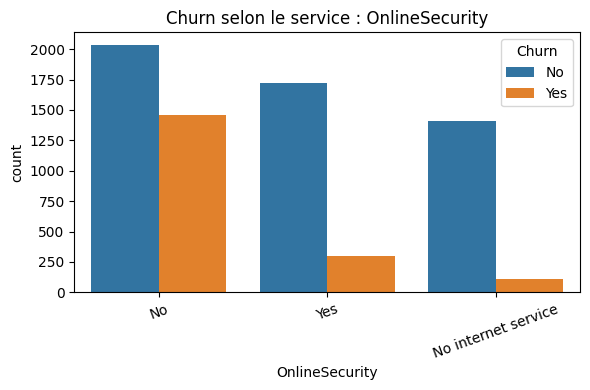

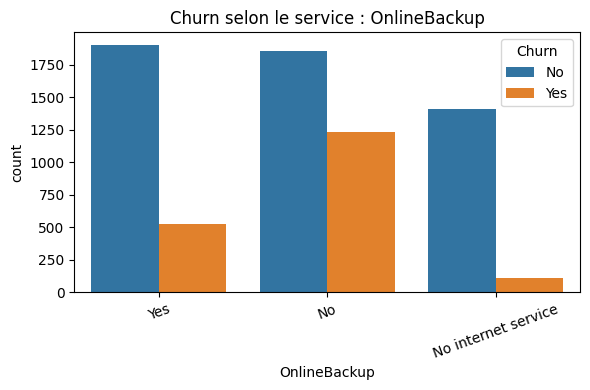

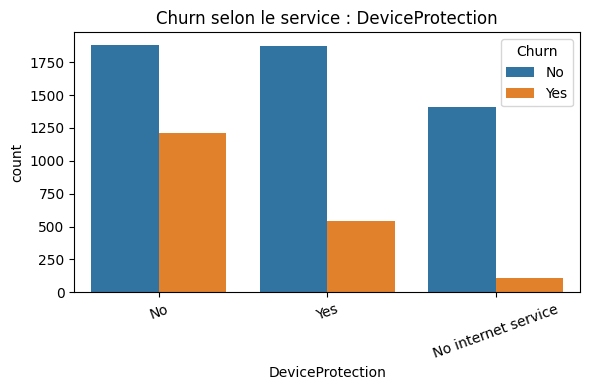

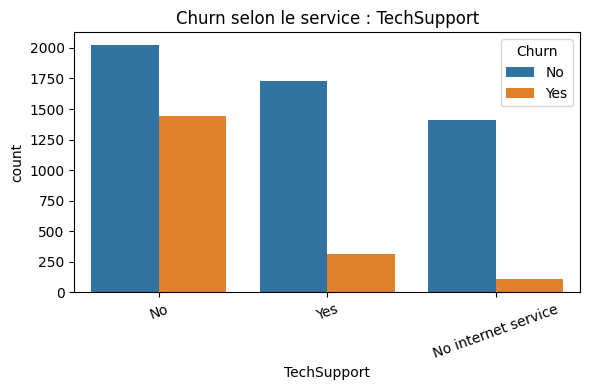

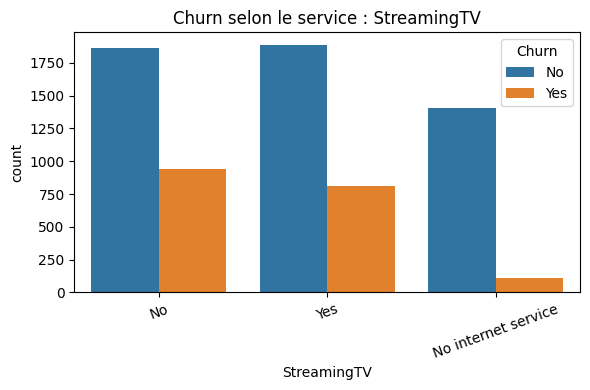

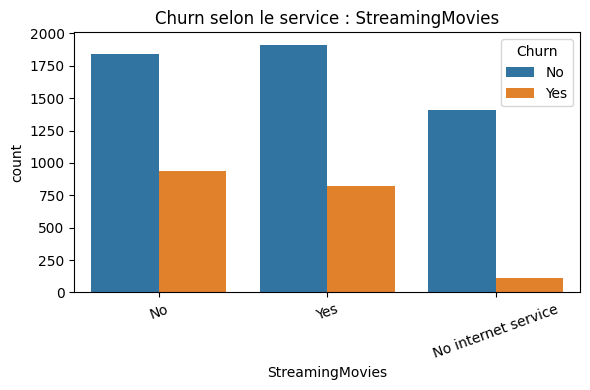

In [81]:
# Services liés à Internet : churn selon souscription

services = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for service in services:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=service, hue='Churn')
    plt.title(f"Churn selon le service : {service}")
    plt.xticks(rotation=20)
    plt.tight_layout()
    plt.show()

In [82]:
#Préparation des données pour le modèle
# Suppression de la colonne customerID
df.drop(columns=['customerID'], inplace=True)

In [83]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [84]:
#Encodage des variables catégorielles
# Afficher les colonnes non numériques
cat_cols = df.select_dtypes(include='object').columns.tolist()
print(cat_cols)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [85]:
#Conversion des colonnes Yes/No en 0/1
binary_cols = [
    'gender', 'Partner', 'Dependents',
    'PhoneService', 'PaperlessBilling', 'Churn'
]

for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})


In [86]:
# Pour gender (Male, Female)
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})



In [87]:
df[binary_cols + ['gender']].head()


,gender,Partner,Dependents,PhoneService,PaperlessBilling,Churn,gender
0,NaN,1,0,0,1,0,NaN
1,NaN,0,0,1,0,0,NaN
2,NaN,0,0,1,1,1,NaN
3,NaN,0,0,0,0,0,NaN
4,NaN,0,0,1,1,1,NaN


In [88]:
# rechargement de la colone gender de la source
df['gender'] = pd.read_csv("C:/Users/PC/Documents/projet_churn_teleco/data/WA_Fn-UseC_-Telco-Customer-Churn.csv")['gender']


In [89]:
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})



In [90]:
df['gender'].value_counts(dropna=False)


gender
1    3549
0    3483
Name: count, dtype: int64

In [91]:
#One-Hot Encoding des variables catégorielles à + de 2 modalités
#lister le reste des colonnes à encoder
df.select_dtypes(include='object').columns.tolist()


['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [92]:
df = pd.get_dummies(df, drop_first=True)


In [93]:
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False


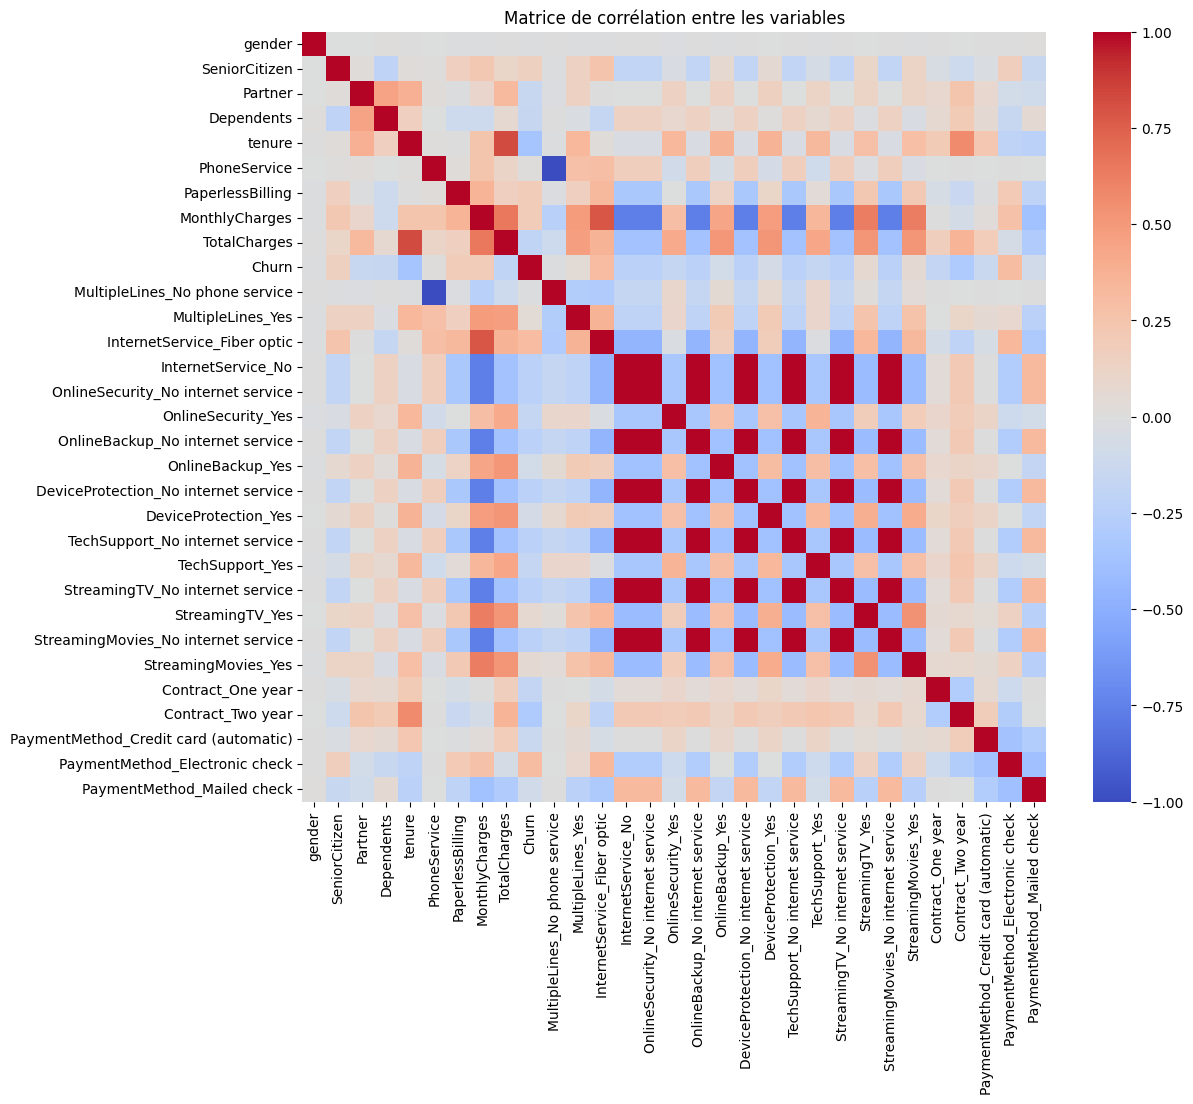

In [94]:
# Matrice de correlation 
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title("Matrice de corrélation entre les variables")
plt.show()

In [95]:
#Correlation avec churn uniquement
correlation_churn = df.corr(numeric_only=True)['Churn'].sort_values(ascending=False)
print(correlation_churn)


Churn                                    1.000000
InternetService_Fiber optic              0.307463
PaymentMethod_Electronic check           0.301455
MonthlyCharges                           0.192858
PaperlessBilling                         0.191454
SeniorCitizen                            0.150541
StreamingTV_Yes                          0.063254
StreamingMovies_Yes                      0.060860
MultipleLines_Yes                        0.040033
PhoneService                             0.011691
gender                                  -0.008545
MultipleLines_No phone service          -0.011691
DeviceProtection_Yes                    -0.066193
OnlineBackup_Yes                        -0.082307
PaymentMethod_Mailed check              -0.090773
PaymentMethod_Credit card (automatic)   -0.134687
Partner                                 -0.149982
Dependents                              -0.163128
TechSupport_Yes                         -0.164716
OnlineSecurity_Yes                      -0.171270


In [96]:
# Détecter les colonnes de type booléen
bool_cols = df.select_dtypes(include='bool').columns

# Afficher les colonnes concernées 
print("Colonnes booléennes à convertir :", list(bool_cols))

# Convertir ces colonnes en int (0/1)
df[bool_cols] = df[bool_cols].astype(int)


Colonnes booléennes à convertir : ['MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']


In [97]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,0,0,0,0,0,1,0


In [98]:
import numpy as np


In [99]:
#feature engineering
#AvgChargesPerMonth : TotalCharges divisé par tenure
df['AvgChargesPerMonth'] = df['TotalCharges'] / df['tenure']
df['AvgChargesPerMonth'] = df['AvgChargesPerMonth'].replace([np.inf, -np.inf], 0).fillna(0)


In [100]:
#HasMultipleServices : 1 si l’utilisateur a plus d’un service internet ou de streaming
service_cols = [
    'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes',
    'StreamingTV_Yes', 'StreamingMovies_Yes'
]

df['HasMultipleServices'] = df[service_cols].sum(axis=1).apply(lambda x: 1 if x > 1 else 0)


In [101]:
#IsAlone : 1 si la personne vit seule et n’a pas de service téléphonique
df['IsAlone'] = ((df['Partner'] == 0) & (df['Dependents'] == 0) & (df['PhoneService'] == 0)).astype(int)


In [102]:
#Sélectionner les colonnes à visualiser (tes nouvelles variables + Churn)
features = ['Churn', 'AvgChargesPerMonth', 'HasMultipleServices', 'IsAlone']
corr_matrix = df[features].corr()


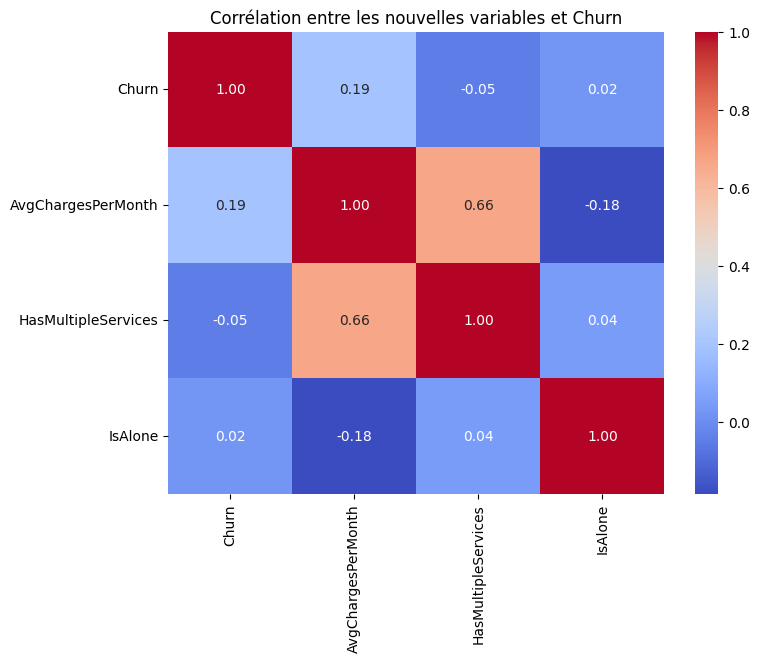

In [103]:
#Affichage de  la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Corrélation entre les nouvelles variables et Churn")
plt.show()


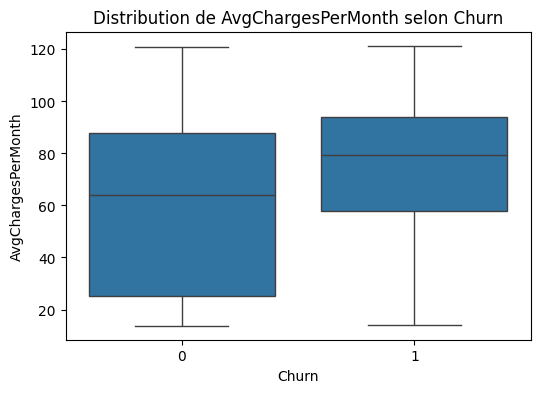

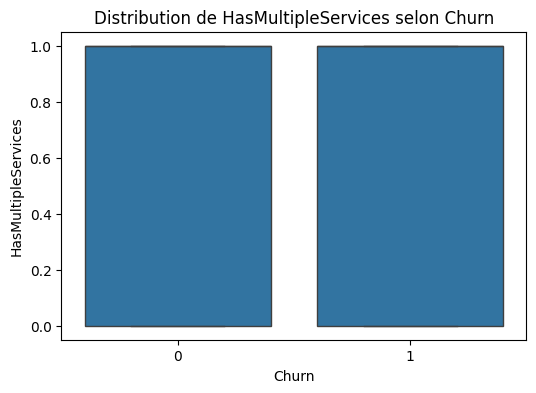

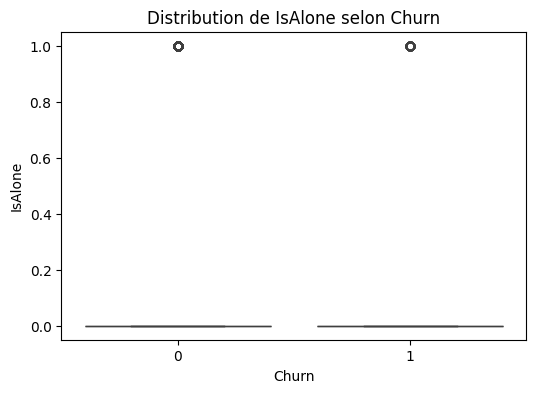

In [104]:
#visualiser la distribution des variables selon Churn
features = ['AvgChargesPerMonth', 'HasMultipleServices', 'IsAlone']

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='Churn', y=feature)
    plt.title(f'Distribution de {feature} selon Churn')
    plt.show()


              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



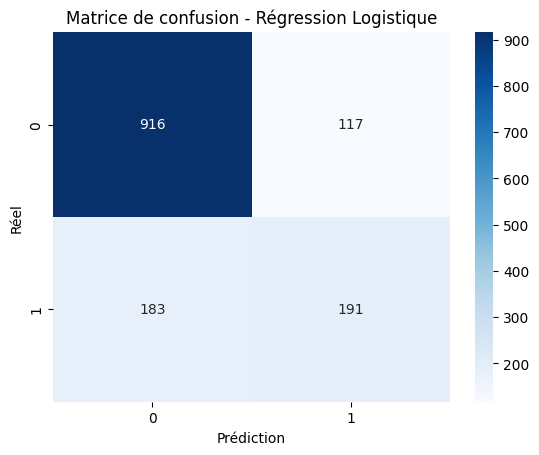

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Séparer features (X) et cible (y)
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Diviser le jeu de données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner la régression logistique
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Prédire
y_pred = logreg.predict(X_test)

# Évaluer
print(classification_report(y_test, y_pred))

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion - Régression Logistique")
plt.xlabel("Prédiction")
plt.ylabel("Réel")
plt.show()


In [106]:
#Entraînement et évaluation de Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Classification Report - Random Forest
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.48      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



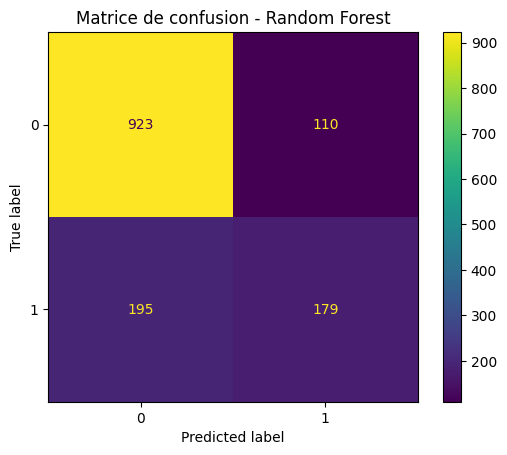

In [107]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Prédictions
y_pred_rf = rf_model.predict(X_test)

# Rapport de classification
print("Classification Report - Random Forest")
print(classification_report(y_test, y_pred_rf))

# Matrice de confusion
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
plt.title("Matrice de confusion - Random Forest")
plt.show()


c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [13:20:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report - XGBoost
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1033
           1       0.61      0.50      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



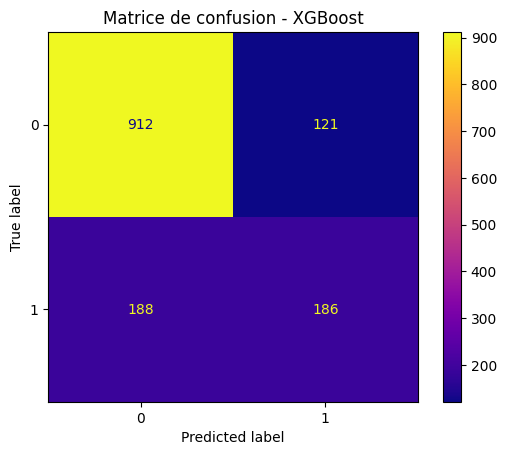

In [108]:
#Entraînement et évaluation de XGBoost
from xgboost import XGBClassifier

# Initialiser le modèle
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Entraînement
xgb_model.fit(X_train, y_train)

# Prédiction
y_pred_xgb = xgb_model.predict(X_test)

# Rapport de classification
print("Classification Report - XGBoost")
print(classification_report(y_test, y_pred_xgb))

# Matrice de confusion
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb, cmap='plasma')
plt.title("Matrice de confusion - XGBoost")
plt.show()


<Figure size 1000x600 with 0 Axes>

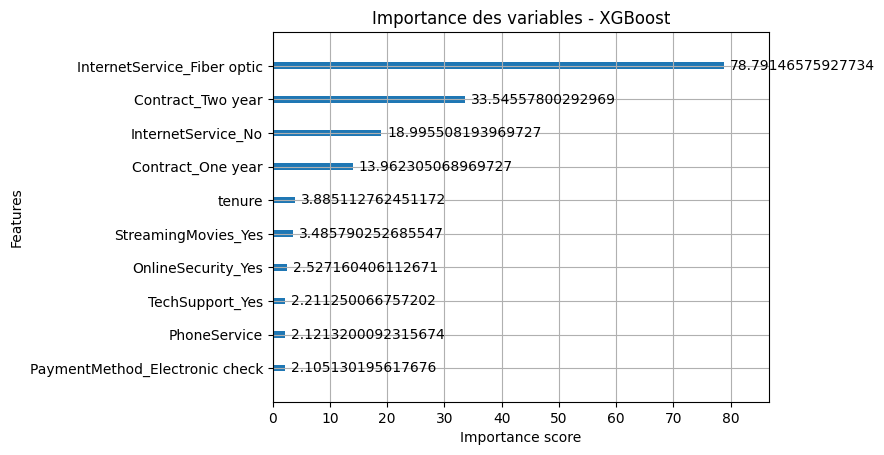

In [109]:
#Afficher l’importance des variables
from xgboost import plot_importance

# Affichage des 10 variables les plus importantes selon XGBoost
plt.figure(figsize=(10, 6))
plot_importance(xgb_model, max_num_features=10, importance_type='gain')  # 'weight' ou 'gain'
plt.title("Importance des variables - XGBoost")
plt.show()


In [110]:
# Extraire l'importance des variables
importances = xgb_model.feature_importances_

# Associer chaque importance à sa variable
features = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Trier par ordre décroissant d'importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Afficher les 10 plus importantes
print("Top 10 des variables les plus importantes :")
print(feature_importance_df.head(10))


Top 10 des variables les plus importantes :
                           Feature  Importance
11     InternetService_Fiber optic    0.419124
26               Contract_Two year    0.178443
12              InternetService_No    0.101045
25               Contract_One year    0.074271
4                           tenure    0.020667
24             StreamingMovies_Yes    0.018542
14              OnlineSecurity_Yes    0.013443
20                 TechSupport_Yes    0.011763
5                     PhoneService    0.011284
28  PaymentMethod_Electronic check    0.011198


In [111]:
# Identifier les variables numériques à standardiser
from sklearn.preprocessing import StandardScaler

# Liste des colonnes numériques à standardiser
cols_to_scale = ['MonthlyCharges', 'TotalCharges', 'tenure', 'AvgChargesPerMonth']

# Initialiser le scaler
scaler = StandardScaler()

# Appliquer le scaling uniquement sur les colonnes choisies
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


Classification Report - Régression Logistique standardisée
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



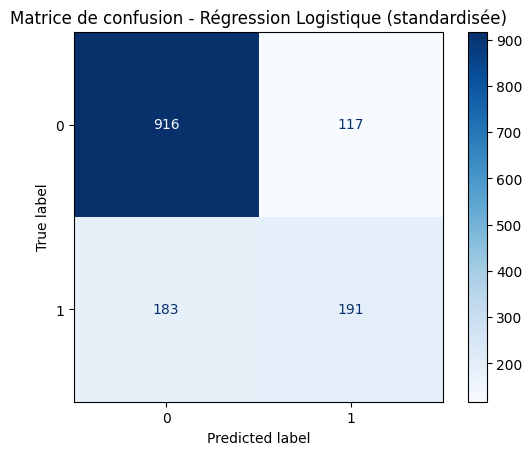

In [112]:
#Réentraîner la régression logistique

# Entraîner le modèle
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

# Prédictions
y_pred = log_model.predict(X_test)

# Évaluation
print("Classification Report - Régression Logistique standardisée")
print(classification_report(y_test, y_pred))

# Matrice de confusion
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title("Matrice de confusion - Régression Logistique (standardisée)")
plt.show()


In [113]:
#Créer un nouveau DataFrame avec les 10 variables importantes (et la cible Churn)
# Liste des variables importantes selon XGBoost
features_importantes = [
    'InternetService_Fiber optic',
    'Contract_Two year',
    'InternetService_No',
    'Contract_One year',
    'tenure',
    'StreamingMovies_Yes',
    'OnlineSecurity_Yes',
    'TechSupport_Yes',
    'PhoneService',
    'PaymentMethod_Electronic check'
]

# Inclure la cible
features_importantes.append('Churn')

# Nouveau DataFrame filtré
df_filtered = df[features_importantes]


In [114]:
df_filtered.head()

,InternetService_Fiber optic,Contract_Two year,InternetService_No,Contract_One year,tenure,StreamingMovies_Yes,OnlineSecurity_Yes,TechSupport_Yes,PhoneService,PaymentMethod_Electronic check,Churn
0,0,0,0,0,-1.280248,0,0,0,0,1,0
1,0,0,0,1,0.064303,0,1,0,1,0,0
2,0,0,0,0,-1.239504,0,1,0,1,0,1
3,0,0,0,1,0.512486,0,1,1,0,0,0
4,1,0,0,0,-1.239504,0,0,0,1,1,1



Classification Report - Régression Logistique
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1549
           1       0.64      0.52      0.57       561

    accuracy                           0.79      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.78      0.79      0.79      2110


Classification Report - Random Forest
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1549
           1       0.53      0.55      0.54       561

    accuracy                           0.75      2110
   macro avg       0.68      0.69      0.68      2110
weighted avg       0.75      0.75      0.75      2110


Classification Report - XGBoost
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1549
           1       0.57      0.51      0.54       561

    accuracy                           0.77      2110
   macro 

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [13:20:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


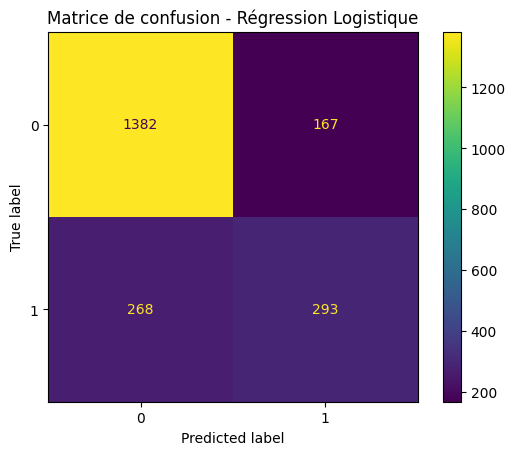

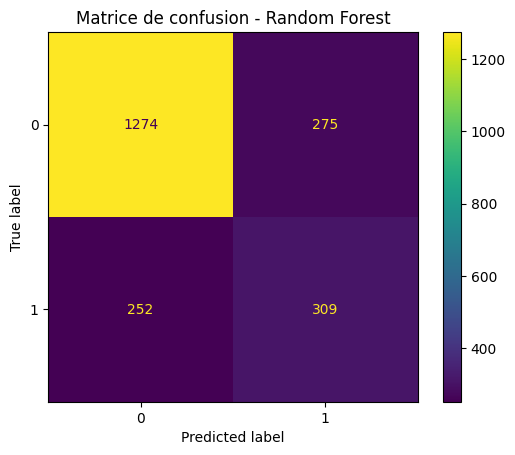

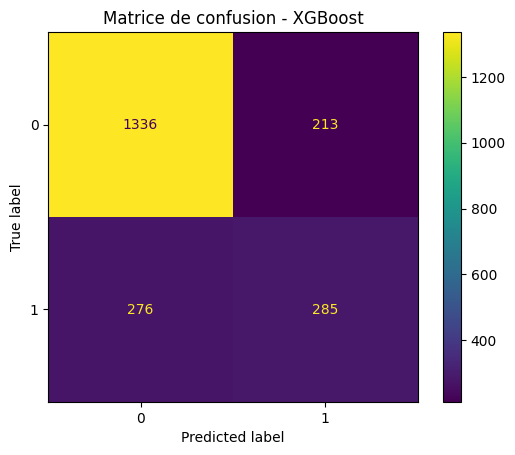

In [115]:
#Réentraîner les trois modèles (Logistic Regression, Random Forest, XGBoost)

# Séparer X et y
X = df_filtered.drop('Churn', axis=1)
y = df_filtered['Churn']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modèles
models = {
    'Régression Logistique': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Entraînement et évaluation
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"\nClassification Report - {name}")
    print(classification_report(y_test, y_pred))
    
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    disp.ax_.set_title(f"Matrice de confusion - {name}")


In [129]:
from sklearn.preprocessing import StandardScaler
import joblib
# Recréer X_train avec uniquement les 10 features importantes
features = [
    "InternetService_Fiber optic",
    "Contract_Two year",
    "InternetService_No",
    "Contract_One year",
    "tenure",
    "StreamingMovies_Yes",
    "OnlineSecurity_Yes",
    "TechSupport_Yes",
    "PhoneService",
    "PaymentMethod_Electronic check"
]

X_train_selected = X_train[features]

# Refit + export
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
joblib.dump(scaler, "../models/standard_scaler.pkl")
print("Scaler exporté avec succès dans 'models/scaler.pkl'")


Scaler exporté avec succès dans 'models/scaler.pkl'


In [130]:
import os


# Créer le dossier 'models' s'il n'existe pas
#os.makedirs("models", exist_ok=True)

# Exporter le modèle
joblib.dump(models, "../models/logistic_model.pkl")


print("Modèle exporté avec succès dans 'models/logistic_model.pkl'")





Modèle exporté avec succès dans 'models/logistic_model.pkl'


In [ ]:
# src/predict.py

# Chemins des fichiers
model_path = "../models/logistic_model.pkl"
scaler_path = "../models/standard_scaler.pkl"
input_data_path = "../data/new_customers.csv"         
output_data_path = "../outputs/predictions.csv"

# Chargement des fichiers
model = joblib.load(model_path)
scaler = joblib.load(scaler_path)


# Chargement des nouvelles données
df_new = pd.read_csv(input_data_path, sep=";")

# Sélection des variables (les mêmes que celles utilisées à l'entraînement)
features = [
    "InternetService_Fiber optic",
    "Contract_Two year",
    "InternetService_No",
    "Contract_One year",
    "tenure",
    "StreamingMovies_Yes",
    "OnlineSecurity_Yes",
    "TechSupport_Yes",
    "PhoneService",
    "PaymentMethod_Electronic check"
]

X_new = df_new[features]

# Standardisation des données
X_scaled = scaler.transform(X_new)

# Prédiction
log_model = models["Régression Logistique"]
predictions = log_model.predict(X_scaled)

# Ajout des prédictions au DataFrame
df_new["Churn_Prediction"] = predictions

# Sauvegarde
os.makedirs("../outputs", exist_ok=True)
df_new.to_csv(output_data_path, index=False)

print(f"Prédictions sauvegardées dans {output_data_path}")


AttributeError: 'dict' object has no attribute 'predict'